# 03: RK and RD

We first need to calculate the 1-sigma allowed region after the ILC prospects have been added. The best fit points shouldn't change. We only calculate in the best scenarios.

In [1]:
import SMEFT19
from SMEFT19.scenarios import scIV, scVII, scIX, scX, scXI
scenarios = [scIV, scVII, scIX, scX, scXI]
bf_points = [(-0.15111781,  0.15206517), (-0.14972665,  0.14965083, -0.26949984), (-0.15251954,),
             (-0.15143862,), (-0.14988535, -0.26939863)]

## Fits

In [2]:
for i, sc in enumerate(scenarios):
    def fit(x):
        return -SMEFT19.likelihood_global(x, sc)
    
    scname = sc.__name__
    scid = scname[2:]
    SMEFT19.SMEFTglob.smelli.flavio.measurements.read_file(f'../../InputsILC/Input_{scname}.yaml')
    SMEFT19.SMEFTglob.restart_smelli(custom_measurements={'likelihood_ewpt.yaml':('ILC250',)})
    bf, v, d, L = SMEFT19.ellipse.minimum(fit, bf_points[i])
    SMEFT19.ellipse.save(bf, v, d, L, f'../../ellipses/{scname}_ILC.yaml', f'Scenario {scid} ILC, PhD version',
                         f'Scenario {scid}')

Minimizing...
Pull: 4.973615677065937 sigma
Minimizing...
Pull: 4.917754968099209 sigma
Minimizing...
Pull: 5.514473561088102 sigma
Minimizing...
Pull: 5.352717500259077 sigma
Minimizing...
Pull: 5.224668007411581 sigma


## Observables

In [5]:
SMEFT19.obsuncert.calculate(scIV, [-0.5, 0], [0, 0.5], '../../observables/obsIV_ILC.yaml',
                            '../../ellipses/scIV_ILC.yaml', name='Scenario IV (ILC)', mode='hess', cores=4)

3 of the measurements of 'Rtaul(B->Dlnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.
3 of the measurements of 'Rtaul(B->D*lnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.


In [6]:
SMEFT19.obsuncert.calculate(scVII, [-0.5, 0, -1], [0, 0.5, 0.5], '../../observables/obsVII_ILC.yaml',
                            '../../ellipses/scVII_ILC.yaml', name='Scenario VII (ILC)', mode='hess', cores=4)

3 of the measurements of 'Rtaul(B->Dlnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.
3 of the measurements of 'Rtaul(B->D*lnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.


In [7]:
SMEFT19.obsuncert.calculate(scIX, [-0.5], [0], '../../observables/obsIX_ILC.yaml',
                            '../../ellipses/scIX_ILC.yaml', name='Scenario IX (ILC)', mode='hess', cores=4)

3 of the measurements of 'Rtaul(B->Dlnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.
3 of the measurements of 'Rtaul(B->D*lnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.


In [8]:
SMEFT19.obsuncert.calculate(scX, [-0.5], [0], '../../observables/obsX_ILC.yaml',
                            '../../ellipses/scX_ILC.yaml', name='Scenario X (ILC)', mode='hess', cores=4)

3 of the measurements of 'Rtaul(B->Dlnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.
3 of the measurements of 'Rtaul(B->D*lnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.


In [9]:
SMEFT19.obsuncert.calculate(scXI, [-0.5, -1], [0, 0.5], '../../observables/obsXI_ILC.yaml',
                            '../../ellipses/scXI_ILC.yaml', name='Scenario XI (ILC)', mode='hess', cores=4)

3 of the measurements of 'Rtaul(B->Dlnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.
3 of the measurements of 'Rtaul(B->D*lnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.


## Plots

In [2]:
from SMEFT19.plots import error_plot

In [3]:
scs = ['IV', 'VII', 'IX', 'X', 'XI']

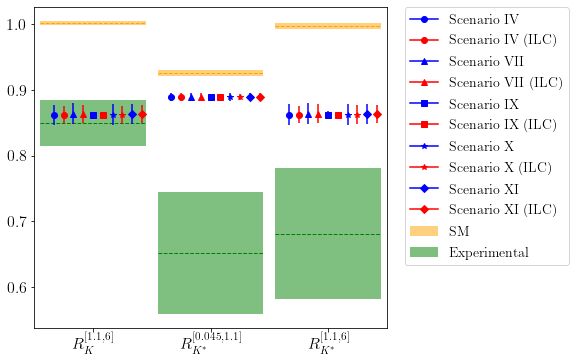

In [6]:
error_plot('../../plots/RKplot_ILC', 'RK', [f'../../observables/obs{s}.yaml' for s in scs],
           [f'../../observables/obs{s}_ILC.yaml' for s in scs], legend=1)

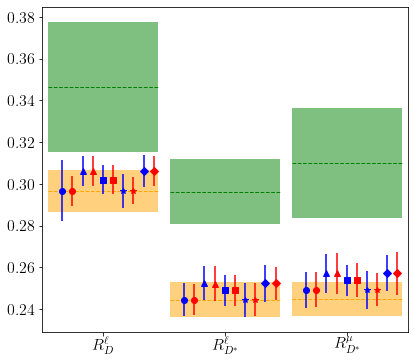

In [8]:
error_plot('../../plots/RDplot_ILC', 'RD', [f'../../observables/obs{s}.yaml' for s in scs],
           [f'../../observables/obs{s}_ILC.yaml' for s in scs], legend=0)